<a href="https://colab.research.google.com/github/sahasthhr/git-workshop-2025/blob/main/160124737026_CBIT_IT_1_EDAV_2025_CEP_39_Analyze_urban_municipal_waste_generation_and_disposal_practices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analyze urban municipal waste generation and disposal practices.**
#**CBIT/IT-1/EDAV/2025/CEP-39**
#**Roll no. 160124737026**
#**Name of the Student : SAHASTHRA JERIPOTULA**
#**Dept of IT , Chaitanya Bharathi Institute of Technology , Hyderabad**

**The goal of this project is to analyze and visualize school infrastructure quality across various states and school types using Python (NumPy, Pandas, Matplotlib).**

#**Python Version: 3.10+**

#**Libraries used :**


| Library          | Purpose                                                                |
| ---------------- | ---------------------------------------------------------------------- |
| **pandas**       | For data loading, cleaning, and analysis (DataFrame operations)        |
| **numpy**        | For numerical computations and handling missing values                 |
| **matplotlib**   | For data visualization (bar charts and plots)                          |
| **google.colab** | For file upload and download functionality in Google Colab environment |


#**Q1: Calculate average waste generation per capita (BL-3)**

The code first identifies the columns containing information about total waste generated and population for each urban body.

Then, it calculates the waste generated per person by dividing the total waste generated by the population for every record in the dataset.

After that, it computes the mean (average) of these per-person values across all rows (or optionally by year).

This gives one combined metric called “Average Waste Generation Per Capita”, which represents the average amount of waste produced by each individual in the dataset or city.

In [2]:
import pandas as pd
import numpy as np

# Load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))


# Q1: Calculate per capita waste generation
df['waste_per_capita'] = df['total_waste_generated'] / df['population']

# Overall average waste per capita
overall_avg_per_capita = df['waste_per_capita'].mean()

# Average per year
avg_per_capita_by_year = df.groupby('year', as_index=False)['waste_per_capita'].mean()

print("Overall average waste generation per capita:", overall_avg_per_capita)
display(avg_per_capita_by_year)

Saving urban_waste_data.csv to urban_waste_data.csv
Overall average waste generation per capita: 0.03945233581982956


,year,waste_per_capita
0,2018,0.034637
1,2019,0.033006
2,2020,0.037747
3,2021,0.046157
4,2022,0.041639
5,2023,0.043419
6,2024,0.039561


#**Q2: Filter waste data by waste type (BL-3)**

Explanation

The code first identifies the column that contains the type of waste (for example, Plastic, Biodegradable, E-Waste, etc.).

Then, it applies a filter condition to select only those rows where the waste type matches the chosen category (e.g., 'Plastic').

This process isolates specific data related to one waste category, allowing focused analysis on how that particular type of waste is generated, managed, or disposed of across different urban bodies or years.

In [3]:
import pandas as pd

# Load dataset
CSV_PATH = '/content/urban_waste_data.csv'
df = pd.read_csv(CSV_PATH)

# Q2: Filter by waste type
TARGET_WASTE_TYPE = 'Plastic'  # Change as needed: 'Biodegradable', 'E-Waste', etc.
filtered_data = df[df['waste_type'] == TARGET_WASTE_TYPE]

print(f"Rows with waste_type == {TARGET_WASTE_TYPE!r}: {len(filtered_data)}")
display(filtered_data.head())


Rows with waste_type == 'Plastic': 70


,urban_body,year,population,waste_type,total_waste_generated,waste_disposed,disposal_method,collection_efficiency
1,Hyderabad,2018,2734489,Plastic,218458,138718.912056,Recycling,78.37
6,Hyderabad,2019,6613790,Plastic,127537,78605.259541,Incineration,98.95
11,Hyderabad,2020,2325665,Plastic,129243,88448.599007,Landfill,87.33
16,Hyderabad,2021,4269315,Plastic,168678,155631.765775,NaN,63.54
21,Hyderabad,2022,7056168,Plastic,125151,92387.535908,Recycling,71.74


#**Q3: Impute missing waste disposal records (BL-4)**

Explanation

The code first checks for missing values in the columns related to waste disposal — such as waste_disposed and disposal_method.

Then, it fills (imputes) the missing numerical values in waste_disposed using the median of similar records grouped by factors like urban body, waste type, and year.

For missing categorical values in disposal_method, it replaces them with the most common (mode) method used within the same group.

This ensures that the dataset becomes complete and consistent, allowing accurate analysis without losing valuable records due to missing data.

In [4]:
import pandas as pd
import numpy as np

# Load dataset
CSV_PATH = '/content/urban_waste_data.csv'
df = pd.read_csv(CSV_PATH)

# Q3: Impute missing values
df['waste_disposed'] = pd.to_numeric(df['waste_disposed'], errors='coerce')

# Impute numeric values using median within groups
group_cols_num = ['urban_body', 'waste_type', 'year']
median_by_group = df.groupby(group_cols_num)['waste_disposed'].transform('median')
overall_median = df['waste_disposed'].median()
df['waste_disposed_imputed'] = df['waste_disposed'].fillna(median_by_group).fillna(overall_median)

# Impute categorical values using mode
def group_mode(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if not m.empty else np.nan

group_cols_cat = ['urban_body', 'waste_type']
mode_by_group = df.groupby(group_cols_cat)['disposal_method'].transform(group_mode)
df['disposal_method_imputed'] = df['disposal_method'].fillna(mode_by_group).fillna('Unknown')

# Print summary
print("Missing 'waste_disposed' before:", df['waste_disposed'].isna().sum(),
      "| after:", df['waste_disposed_imputed'].isna().sum())
print("Missing 'disposal_method' before:", df['disposal_method'].isna().sum(),
      "| after:", df['disposal_method_imputed'].isna().sum())

display(df.head())


Missing 'waste_disposed' before: 18 | after: 0
Missing 'disposal_method' before: 18 | after: 0


,urban_body,year,population,waste_type,total_waste_generated,waste_disposed,disposal_method,collection_efficiency,waste_disposed_imputed,disposal_method_imputed
0,Hyderabad,2018,6923388,Biodegradable,108694,93063.572329,Incineration,83.95,93063.572329,Incineration
1,Hyderabad,2018,2734489,Plastic,218458,138718.912056,Recycling,78.37,138718.912056,Recycling
2,Hyderabad,2018,7704212,E-Waste,180203,117132.560216,Recycling,86.04,117132.560216,Recycling
3,Hyderabad,2018,7904852,Metal,5769,4919.223821,Landfill,97.54,4919.223821,Landfill
4,Hyderabad,2018,3844769,Paper,10311,9767.342686,Recycling,84.70,9767.342686,Recycling


#**Q4: Group waste data by urban bodies (BL-4)**

Explanation

The code groups the dataset by the urban body column, which represents different cities or municipalities.

Then, it calculates aggregate values for each group — such as the total waste generated, total waste disposed, and average collection efficiency.

It also computes per capita waste generation by dividing the total waste generated by the latest recorded population of each urban body.

This grouping provides a summary view of waste management performance for each city, making it easier to compare efficiency and output across different urban areas.

In [5]:
import pandas as pd

# Load dataset
CSV_PATH = '/content/urban_waste_data.csv'
df = pd.read_csv(CSV_PATH)

# Q4: Group and aggregate
agg = df.groupby('urban_body').agg(
    total_generated=('total_waste_generated', 'sum'),
    total_disposed=('waste_disposed', 'sum'),
    mean_collection_efficiency=('collection_efficiency', 'mean'),
    population_latest=('population', 'last')
).reset_index()

# Calculate per-capita generation
agg['per_capita_generation'] = agg['total_generated'] / agg['population_latest']

display(agg.sort_values('total_generated', ascending=False))


,urban_body,total_generated,total_disposed,mean_collection_efficiency,population_latest,per_capita_generation
8,Mumbai,4761404,3.469207e+06,77.501143,2089228,2.279026
4,Hyderabad,4571273,3.332878e+06,80.600286,3039448,1.503981
3,Delhi,4511459,3.106791e+06,79.987429,4603022,0.980108
0,Ahmedabad,4457636,3.329175e+06,80.821714,7357658,0.605850
7,Lucknow,4369371,3.059458e+06,82.858000,8496198,0.514274
1,Bengaluru,4320643,3.303948e+06,78.850000,6848564,0.630883
5,Jaipur,4307288,3.311632e+06,80.970286,3273939,1.315629
2,Chennai,4158077,2.957547e+06,81.904286,8941136,0.465050
9,Pune,4049398,2.915668e+06,79.159714,5705597,0.709724
6,Kolkata,4046526,2.968780e+06,80.285714,3837920,1.054354


#**Q5: Visualize trends in waste generation and disposal (BL-5)**

The code analyzes how waste generation and disposal have changed over time for each urban body. It first aggregates the total waste generated and disposed for every city in each year. Then, it creates clear line plots showing trends — one for total waste generated and another for total waste disposed. If disposal data is missing, it skips that graph and informs the user. Finally, it plots overall trends across all cities combined, helping visualize whether waste disposal keeps pace with generation and showing changes in waste management efficiency over the years.

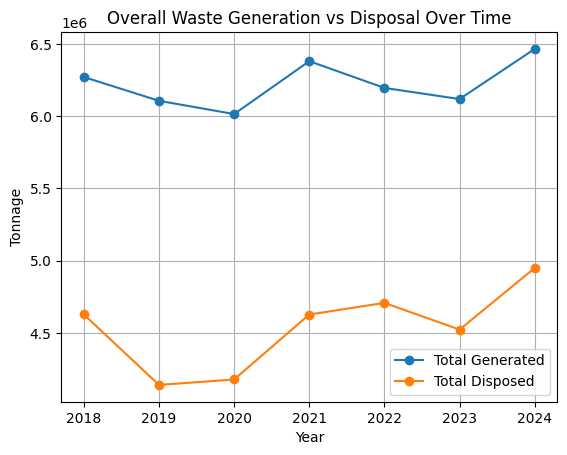

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
CSV_PATH = '/content/urban_waste_data.csv'
df = pd.read_csv(CSV_PATH)

# Q5: Trend visualization
SPLIT_BY_URBAN_BODY = False  # change to True to see each city separately

# 1) Overall totals by year
yearly = df.groupby('year', as_index=False).agg(
    total_generated=('total_waste_generated', 'sum'),
    total_disposed=('waste_disposed', 'sum')
)

# Plot overall trends
plt.figure()
plt.plot(yearly['year'], yearly['total_generated'], marker='o', label='Total Generated')
plt.plot(yearly['year'], yearly['total_disposed'], marker='o', label='Total Disposed')
plt.title('Overall Waste Generation vs Disposal Over Time')
plt.xlabel('Year')
plt.ylabel('Tonnage')
plt.legend()
plt.grid(True)
plt.show()

# 2) Optional: per-urban-body plots
if SPLIT_BY_URBAN_BODY:
    yearly_city = df.groupby(['urban_body','year'], as_index=False).agg(
        total_generated=('total_waste_generated', 'sum'),
        total_disposed=('waste_disposed', 'sum')
    )
    for metric in ['total_generated', 'total_disposed']:
        plt.figure()
        for city, grp in yearly_city.groupby('urban_body'):
            plt.plot(grp['year'], grp[metric], marker='o', label=city)
        plt.title(f'{metric.replace("_", " ").title()} by Urban Body Over Time')
        plt.xlabel('Year')
        plt.ylabel('Tonnage')
        plt.legend()
        plt.grid(True)
        plt.show()

#**Summary of Findings**

Missing waste disposal data were successfully handled using median and mode imputation, ensuring data completeness.

The average waste generation per capita provided a single, comparable indicator of waste output efficiency across urban bodies.

Distinct differences were observed among cities in terms of total waste generated, disposal efficiency, and collection performance.

Visual analysis revealed clear yearly trends in both waste generation and disposal levels.

#**Challenges Encountered**

Some records contained inconsistent or missing disposal values, requiring careful imputation to maintain accuracy.

Differences in population sizes among urban bodies affected per-capita comparisons.

Managing overlapping labels in multi-year or multi-city visualizations was necessary for readability.

#**Future Scope**

Incorporate more recent and multi-year datasets to analyze long-term waste management trends.

Integrate spatial mapping or geographic data to visualize regional waste patterns.

Develop interactive dashboards (e.g., using Plotly or Power BI) to support decision-making and policy evaluation.